In [3]:
%matplotlib widget


In [6]:
import librosa
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
root_path = "../data/big_data/1/"

# Define the base name for the audio/text files
file_base = 'text'

# Construct file paths for the audio and text files
audio_file = os.path.join(root_path, file_base + '.wav')
text_file = os.path.join(root_path, file_base + '.txt')

# Load the audio file
signal, sr = librosa.load(audio_file, sr=None)
duration = librosa.get_duration(y=signal, sr=sr)
print("Audio Duration (seconds):", duration)

# Read the text file (CSV format) without a header
df_text = pd.read_csv(text_file, header=None)

# Keep only the first two columns (col 0: timestamp, col 1: event)
df_text = df_text[[0, 1]]
df_text.columns = ['time_step', 'event']

df_text.head()

Audio Duration (seconds): 200.09929705215418


,time_step,event
0,99292176,0
1,100453977,1
2,101852169,0
3,103012891,1
4,104131542,0


c:\projects\scaai\.venv\Lib\site-packages\ipympl\backend_nbagg.py:335: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


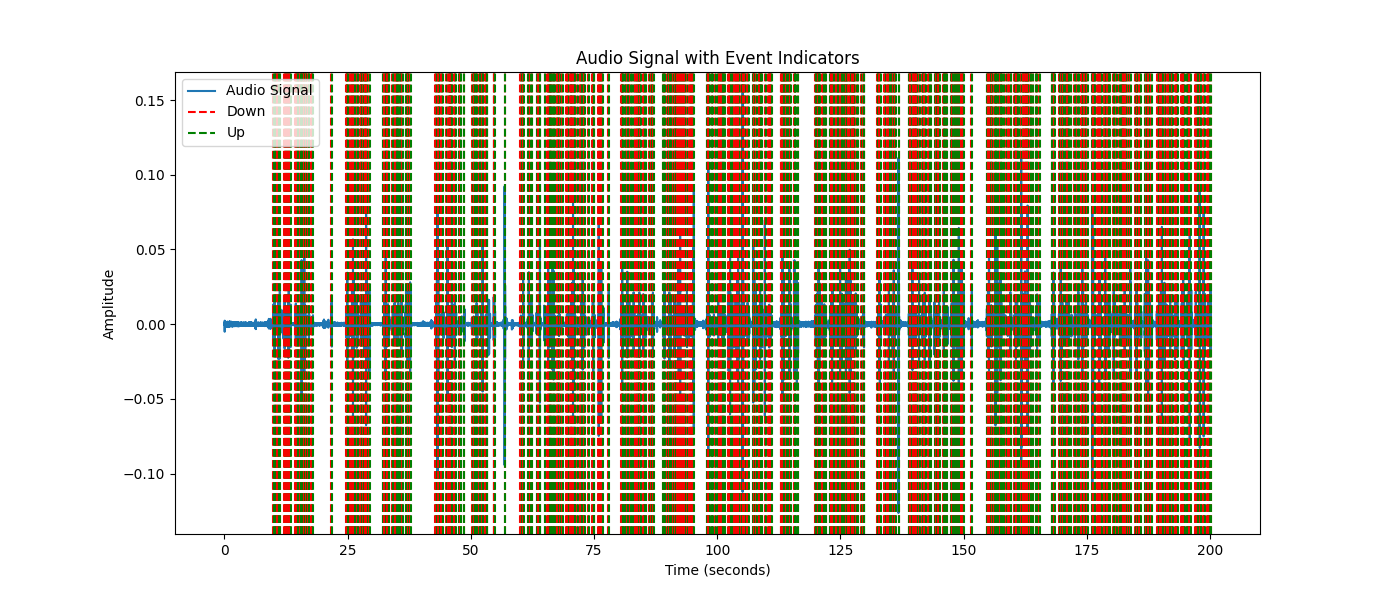

In [20]:
# Create a time axis for the audio signal (in seconds)
time_axis = np.arange(len(signal)) / sr

# Plot the audio signal using time (seconds) on the x-axis
plt.figure(figsize=(14, 6))
plt.plot(time_axis, signal, label='Audio Signal')

# Flags to ensure each label is added only once
down_label_added = False
up_label_added = False

# Loop over each event in the dataframe
for index, row in df_text.iterrows():
    # Convert the timestamp from microseconds to seconds
    event_time = row['time_step'] / 1e7  + 0.042
    if row['event'] == 0:  # Down event
        label = "Down" if not down_label_added else ""
        down_label_added = True
        plt.axvline(x=event_time, color='r', linestyle='--', label=label)
    elif row['event'] == 1:  # Up event
        label = "Up" if not up_label_added else ""
        up_label_added = True
        plt.axvline(x=event_time, color='g', linestyle='--', label=label)

plt.title('Audio Signal with Event Indicators')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

c:\projects\scaai\.venv\Lib\site-packages\ipympl\backend_nbagg.py:335: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


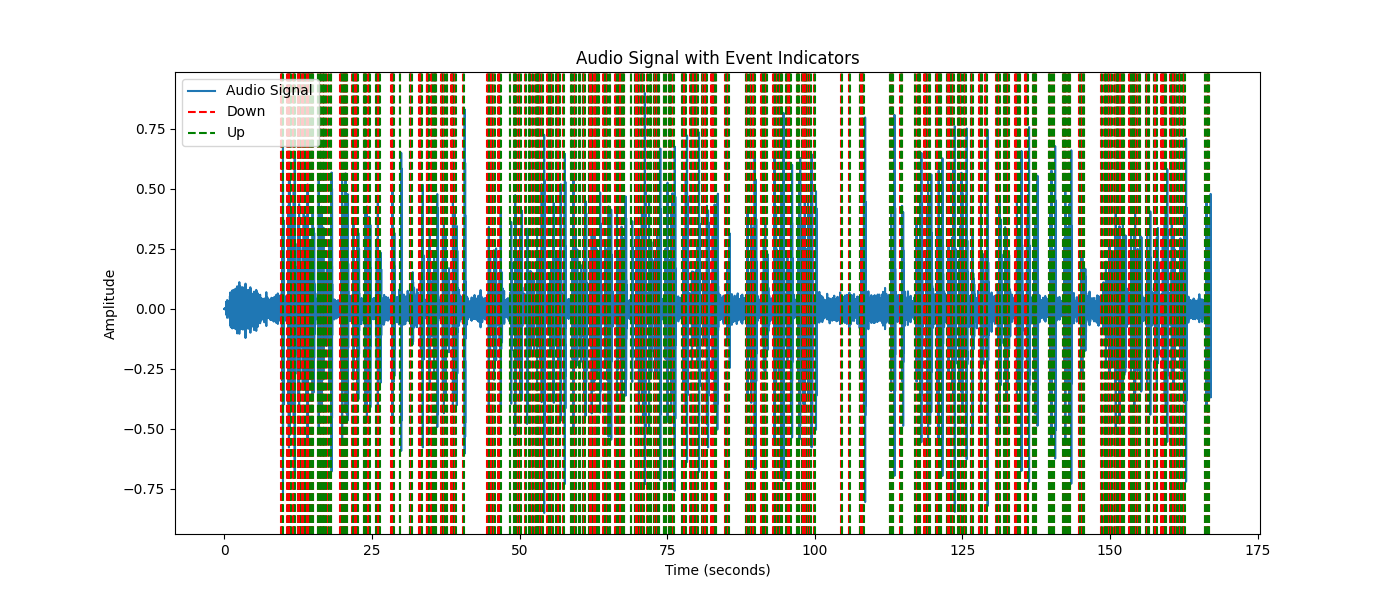

In [18]:
# Create a time axis for the audio signal (in seconds)
time_axis = np.arange(len(signal)) / sr

# Plot the audio signal using time (seconds) on the x-axis
plt.figure(figsize=(14, 6))
plt.plot(time_axis, signal, label='Audio Signal')

# Flags to ensure each label is added only once
down_label_added = False
up_label_added = False

# Loop over each event in the dataframe
for index, row in df_text.iterrows():
    # Convert the timestamp from microseconds to seconds
    event_time = row['time_step'] / 1e7  + 0.042
    if row['event'] == 0:  # Down event
        label = "Down" if not down_label_added else ""
        down_label_added = True
        plt.axvline(x=event_time, color='r', linestyle='--', label=label)
    elif row['event'] == 1:  # Up event
        label = "Up" if not up_label_added else ""
        up_label_added = True
        plt.axvline(x=event_time, color='g', linestyle='--', label=label)

plt.title('Audio Signal with Event Indicators')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()